In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas

In [21]:
# Load data
file_path = "Data/shopping_data_cleaned.csv"
df_shopping = pd.read_csv(file_path)
df_shopping.head(10)

,CardMember,Age,AnnualIncome,SpendingScore
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0
5,0,22.0,17.0,76.0
6,0,35.0,18.0,6.0
7,0,23.0,18.0,94.0
8,1,64.0,19.0,3.0
9,0,30.0,19.0,72.0


In [22]:
df_shopping.dtypes

CardMember         int64
Age              float64
AnnualIncome     float64
SpendingScore    float64
dtype: object

In [23]:
df_shopping.hvplot.scatter(x="AnnualIncome", y="SpendingScore")

:Scatter   [AnnualIncome]   (SpendingScore)

In [24]:
# Function to cluster and plot dataset
def test_cluster_amount(df, clusters):
    model = KMeans(n_clusters=clusters, random_state=5)
    model

    # Fitting model
    model.fit(df)

    # Add a new class column to df_iris
    df["class"] = model.labels_

In [25]:
test_cluster_amount(df_shopping, 4)
df_shopping.hvplot.scatter(x="AnnualIncome", y="SpendingScore", by="class")

:NdOverlay   [class]
   :Scatter   [AnnualIncome]   (SpendingScore)

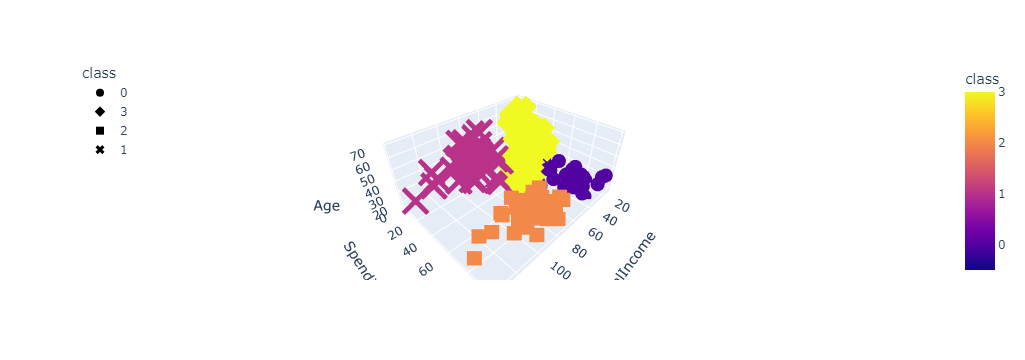

In [26]:
fig = px.scatter_3d(
    df_shopping,
    x="AnnualIncome",
    y="SpendingScore",
    z="Age",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()